## Here we will perofrm Multiple Regression on a Dataset to predict profit of a startup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv('50_Startups.csv')

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [24]:
x= df.iloc[:,:-1] ##Independent Variables
y= df.iloc[:,-1]  ##Dependent Variable

Here we have a categorical variable so lets perform one hot encoding to convert into numerical variables

In [26]:
states= pd.get_dummies(x['State'],drop_first=True)

In [30]:
x= x.drop(['State'],axis=1)


In [31]:
x= pd.concat([x,states],axis=1)

In [32]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


### Now we have a dataset with no numerical values and we have divided out data set in inderpendent and dependent variables
### Now we can perform our Multiple Regression Analysis

Let us split our data in Train and Test data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression

Multiple regression does not have any other liabrary it just gets executed in Linear Regression model only our features get multiple

In [37]:
lireg= LinearRegression()

In [38]:
lireg.fit(X_train,Y_train)

LinearRegression()

In [45]:
y_predict= lireg.predict(X_test)
y_predict

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

Let's check our accuracy of the model

In [40]:
from sklearn.metrics import r2_score

In [41]:
score= r2_score(Y_test,y_predict)

In [42]:
score

0.9347068473282423

As we see our Model worked quite well as we get a score of .93 which is close to 1

Now let us visualize our predictions

In [43]:
import seaborn as sns

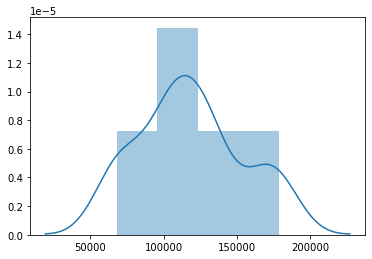

In [48]:
sns.distplot(y_predict)